# Assignment-05
# Multiple linear Regression
# Question 1
Predicting Price by considering given columns from the given data "ToyotaCorolla.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
toyo=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
toyo.shape

(1436, 38)

In [6]:
toyo.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
toyo2.shape

(1436, 9)

In [10]:
toyo2.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [11]:
toyo2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Corelation matrix

In [12]:
toyo2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [13]:
toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


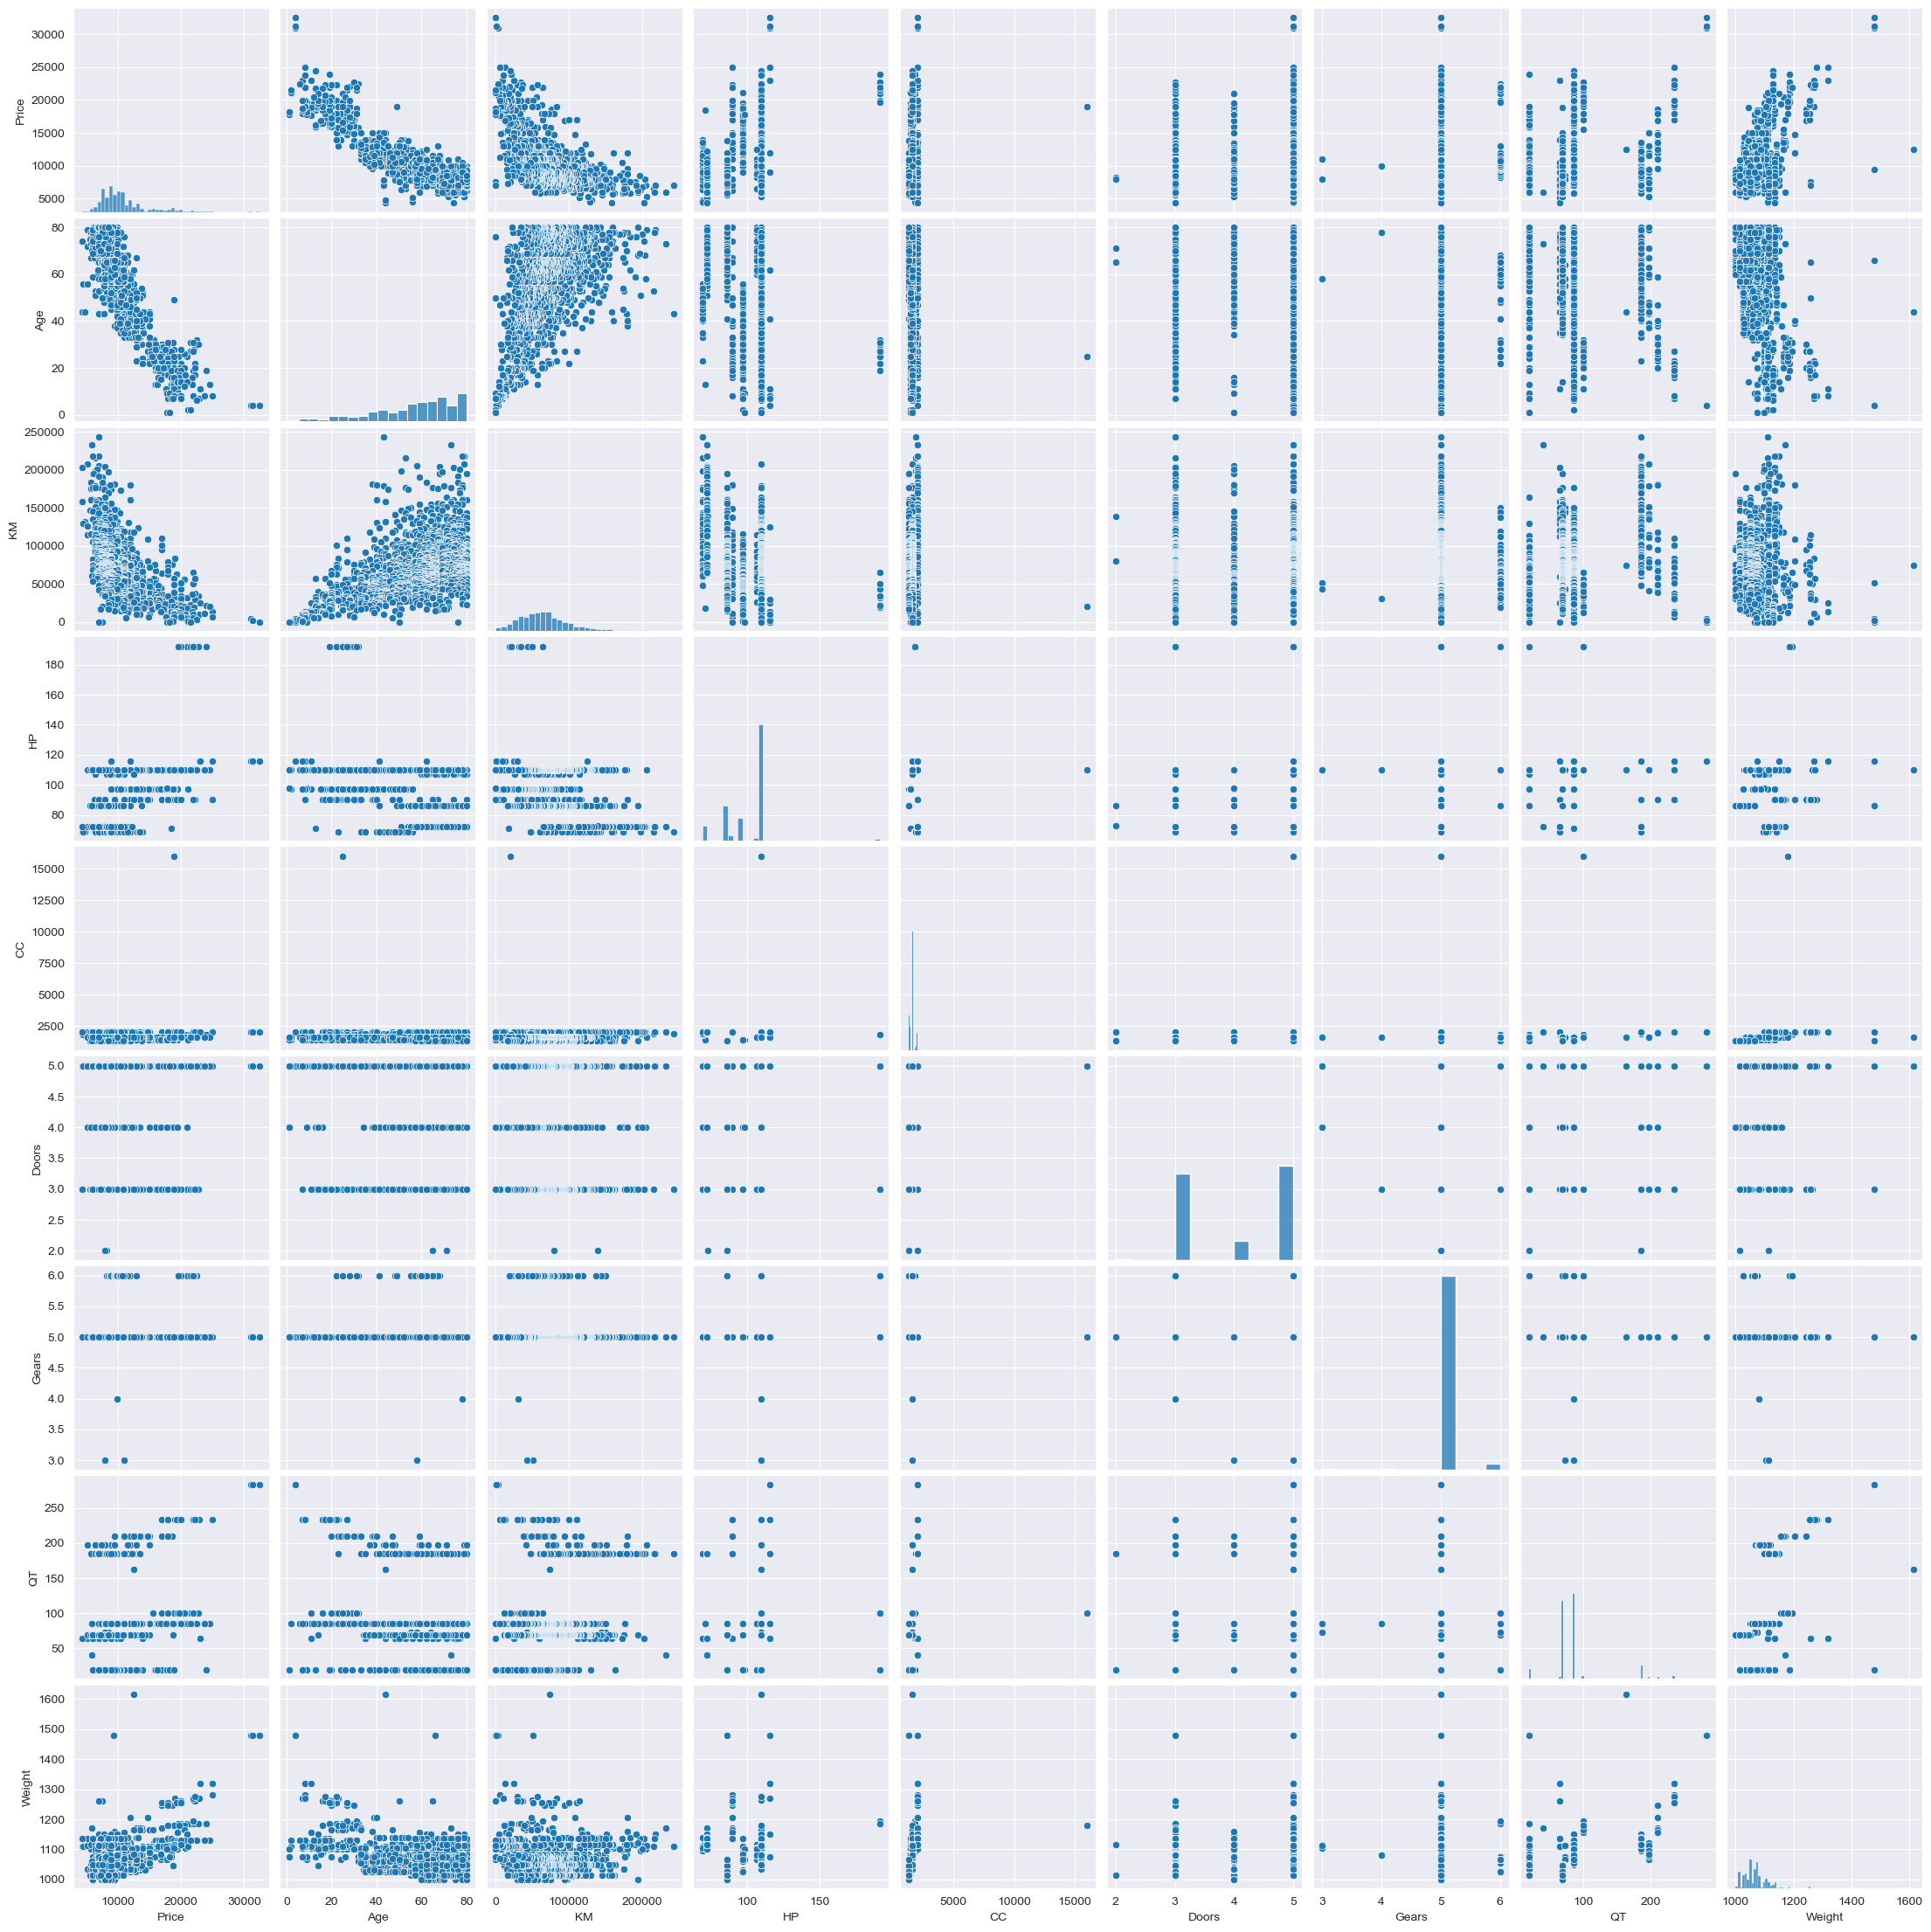

In [14]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(toyo3)  

# Preparing Model

In [15]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:24:47   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As probability value of 'cc' and 'doors' is greater than 0.05 those are insignificant.

lets cross verify building linear model with those

In [16]:
mod_s1=smf.ols('Price~CC',data=toyo3).fit()
mod_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.55e-06
Time:                        13:24:47   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
CC             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
mod_s2=smf.ols('Price~Doors',data=toyo3).fit()
mod_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.46e-12
Time:                        13:24:47   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
mod_s3=smf.ols('Price~CC+Doors',data=toyo3).fit()
mod_s3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.15e-15
Time:                        13:24:47   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
CC             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In cross verifying i came to know that p value for our cc+doors data is less than 0.05 so we have to consider them in our regresion model and they are significant

In [19]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_CC=1/(1-rsq_CC)
rsq_Doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo3).fit().rsquared
vif_QT=1/(1-rsq_QT)
rsq_Weight=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo3).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

d1 = {'Variables':['age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame







,Variables,VIF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


VIF of all variables is within limits,considerably good so we have to consider all equations in regression model

# Model validation

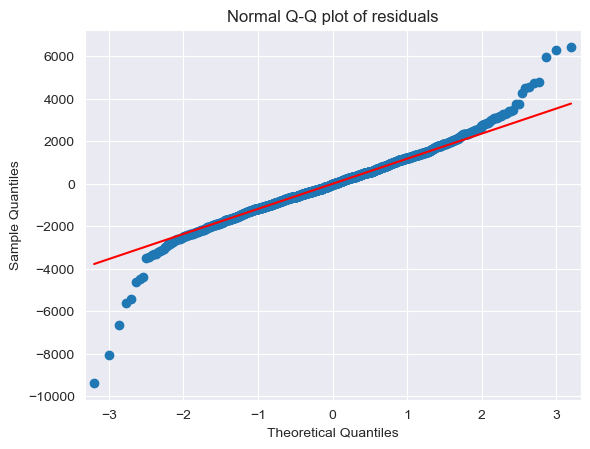

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [22]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

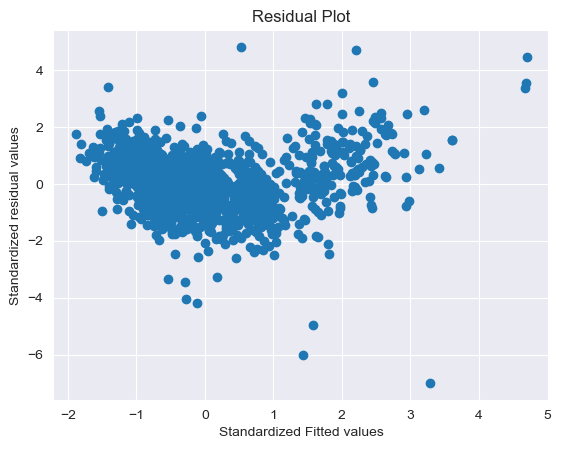

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


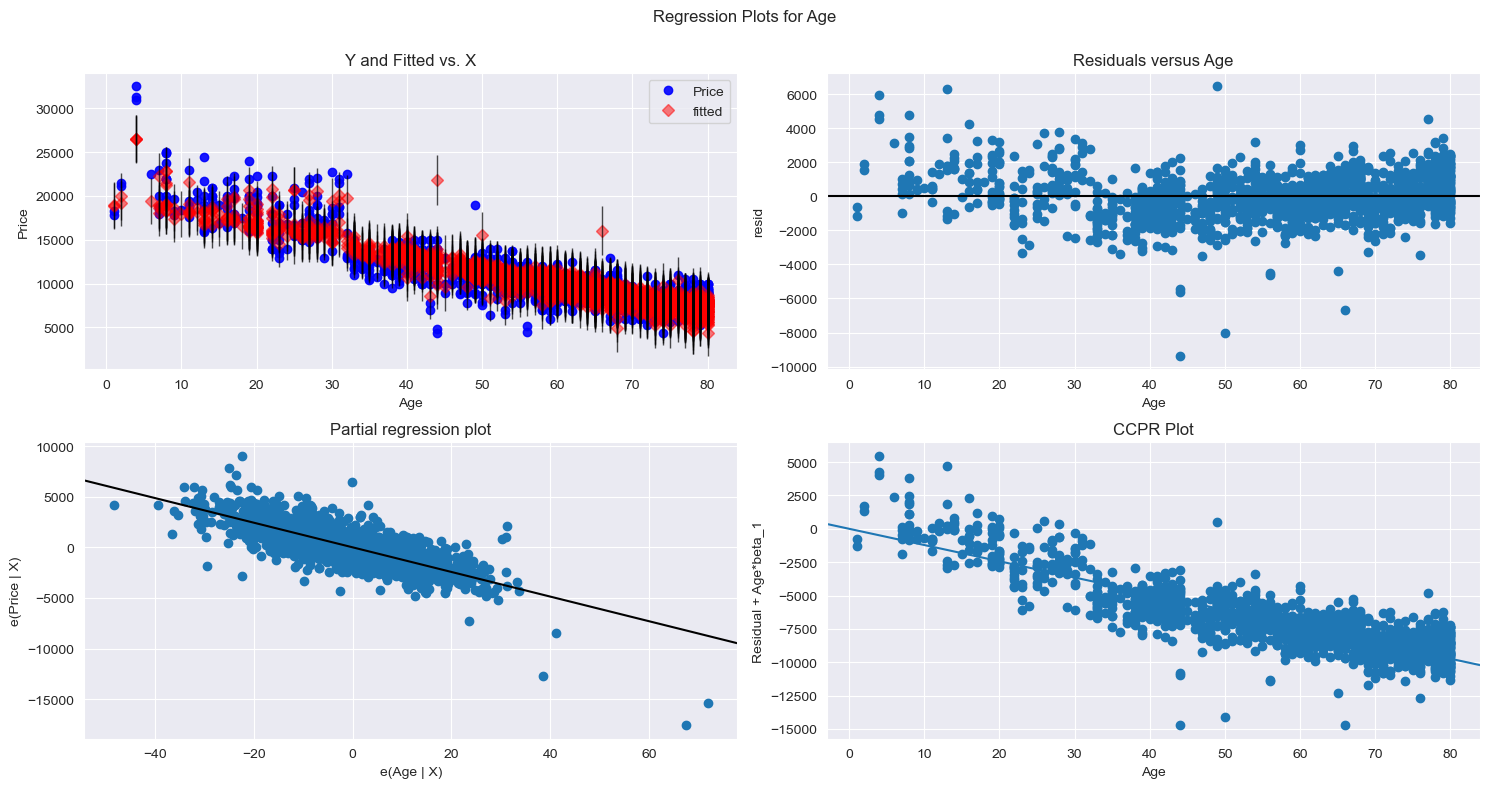

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


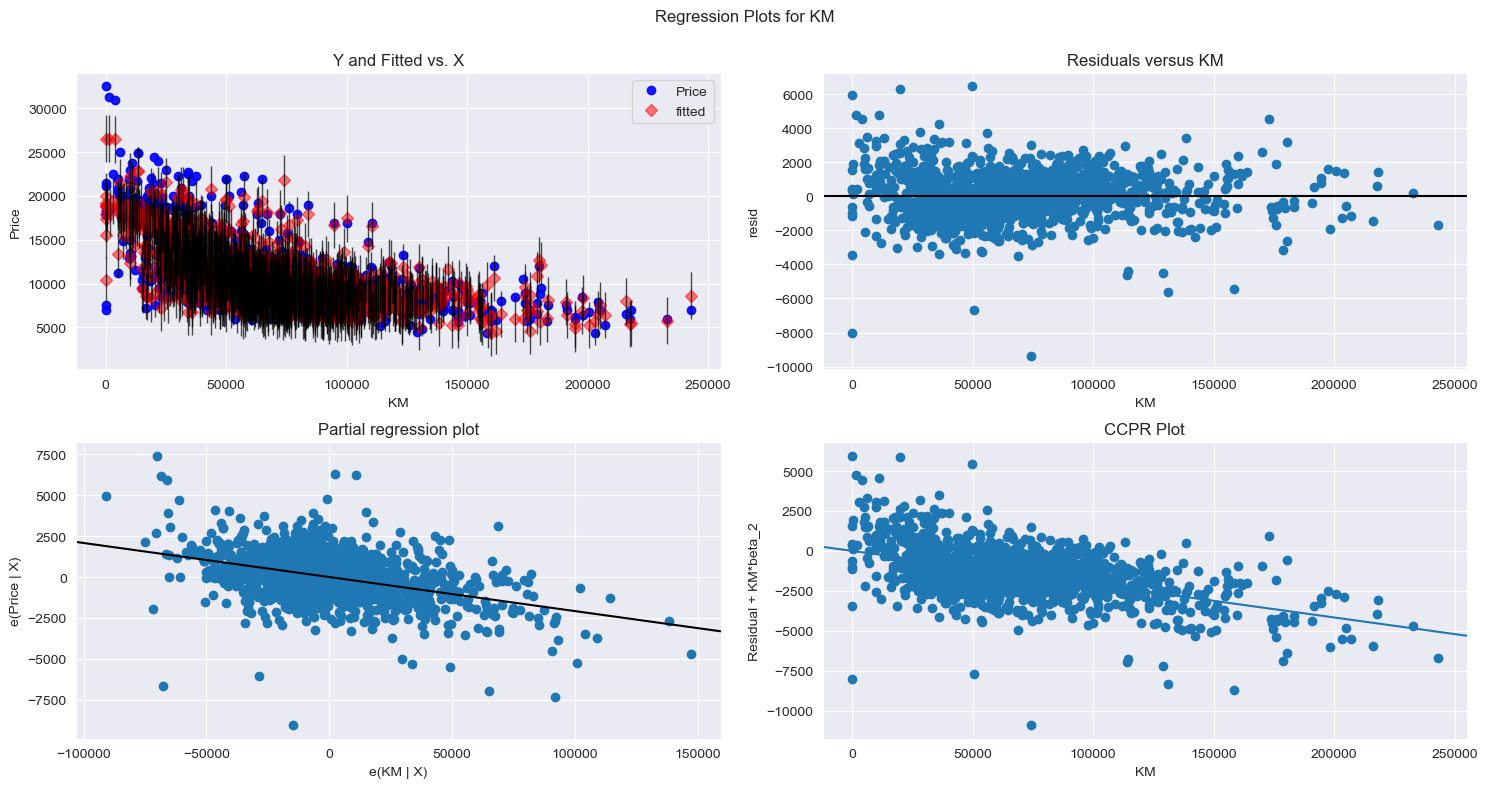

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show() 

eval_env: 1


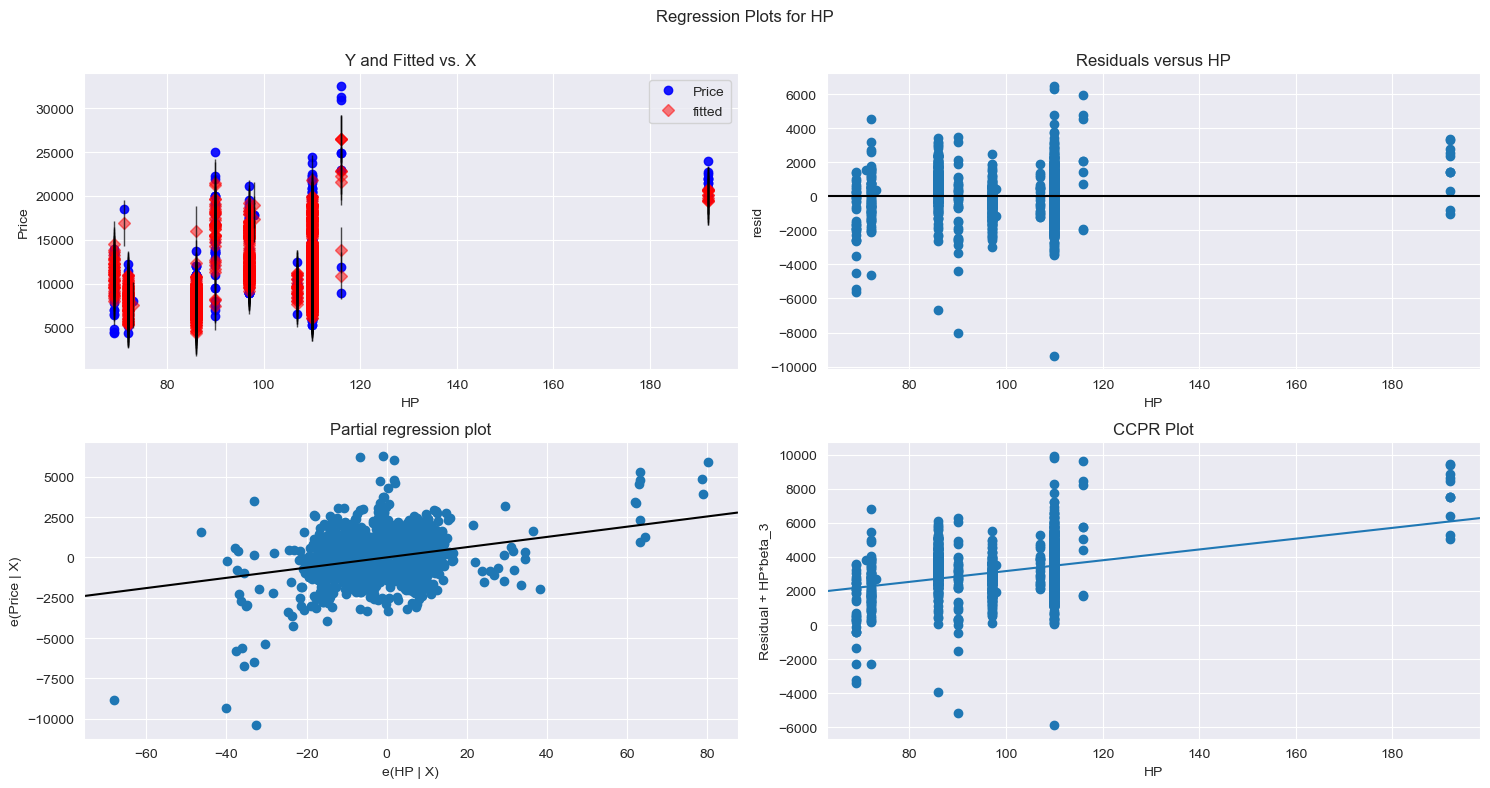

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


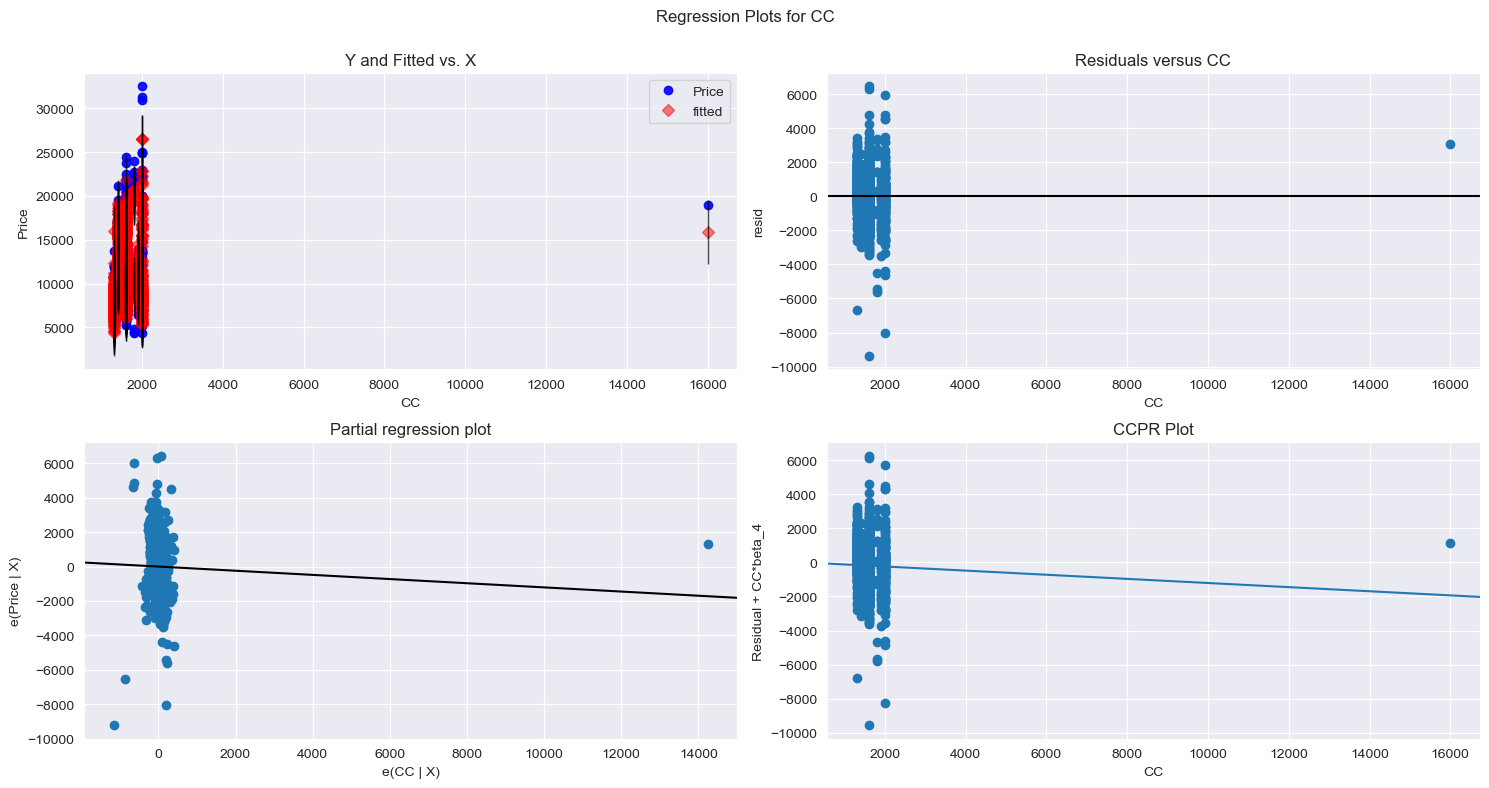

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show() 

eval_env: 1


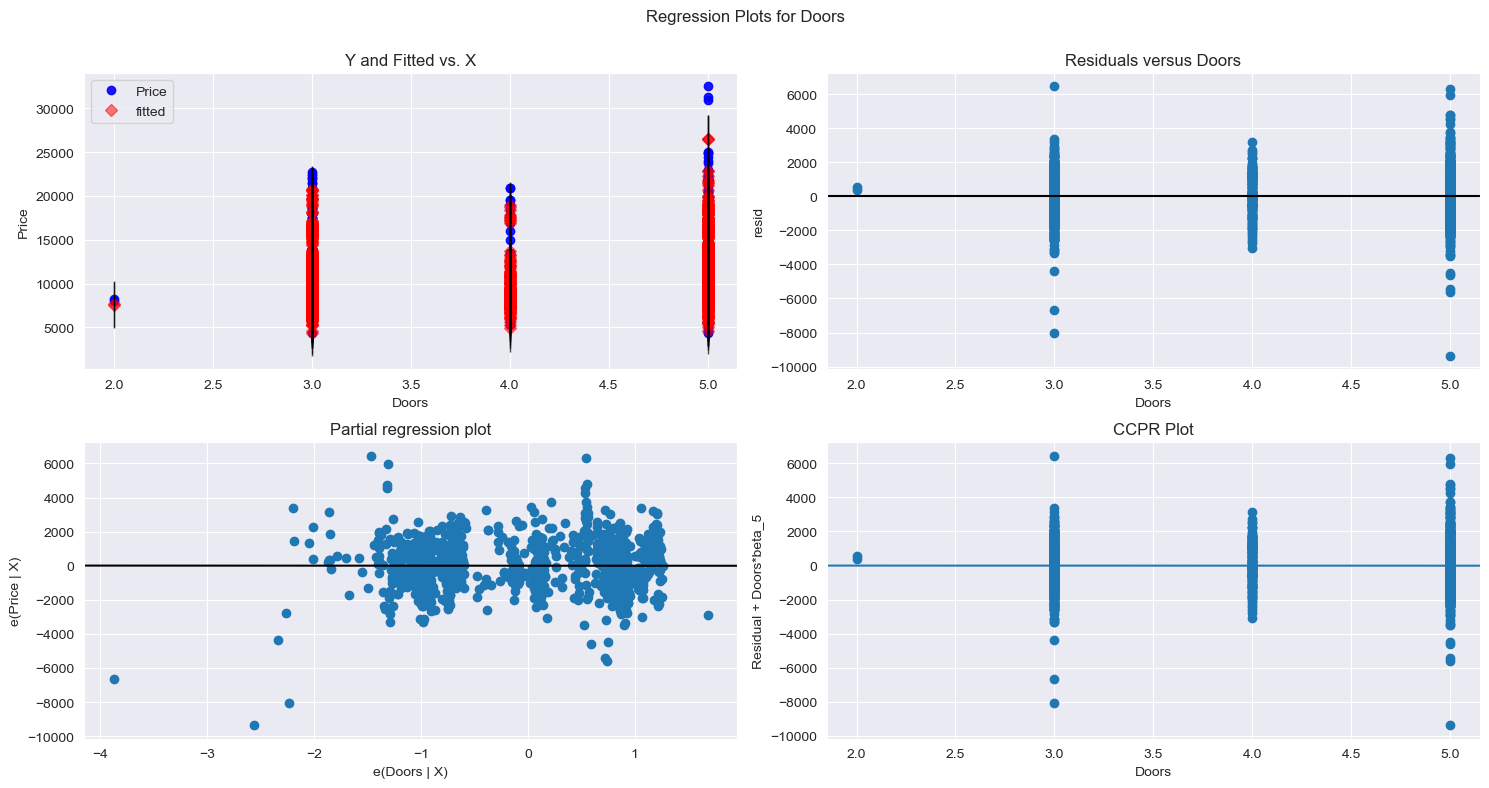

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show() 

eval_env: 1


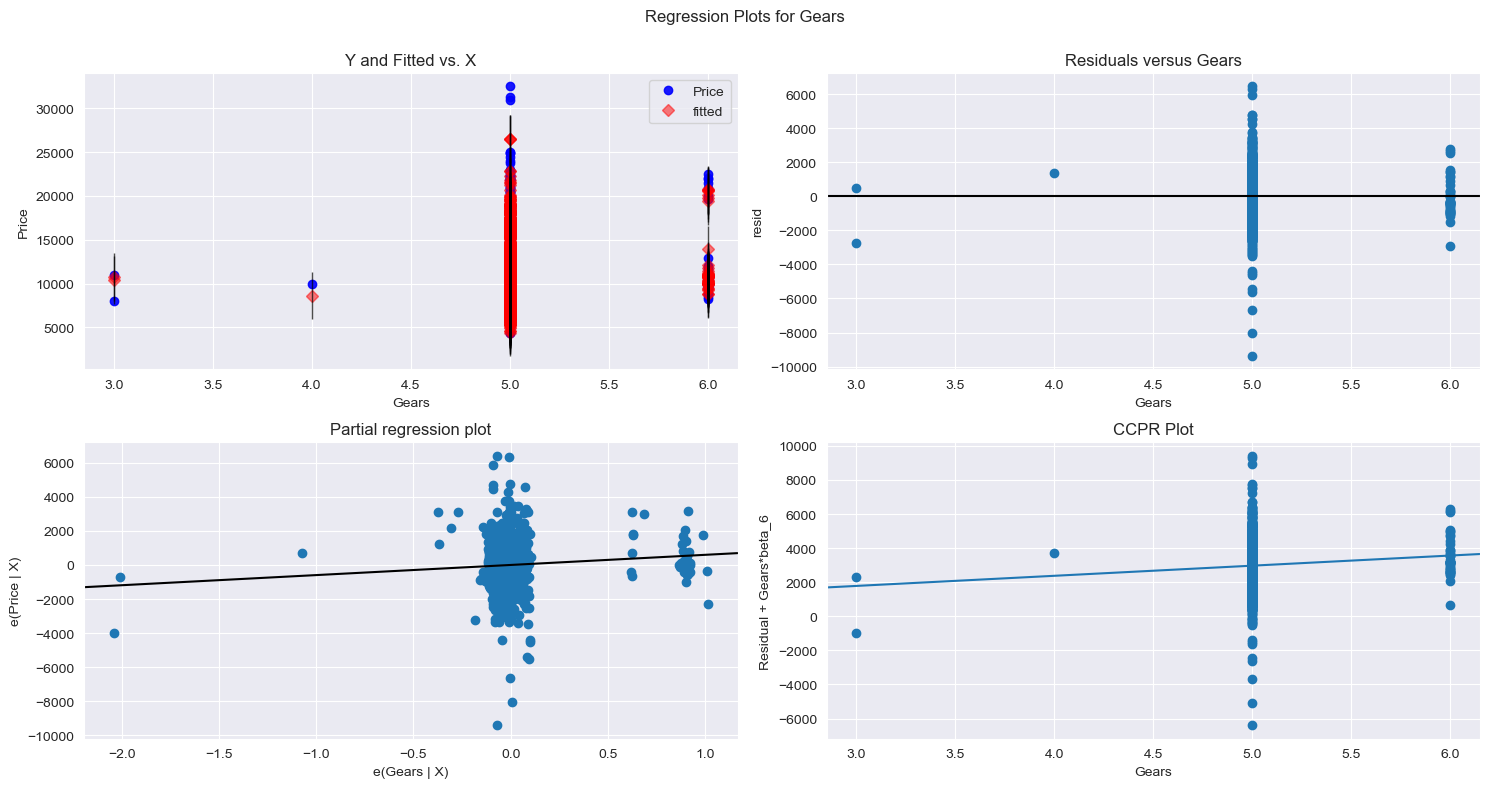

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show() 

eval_env: 1


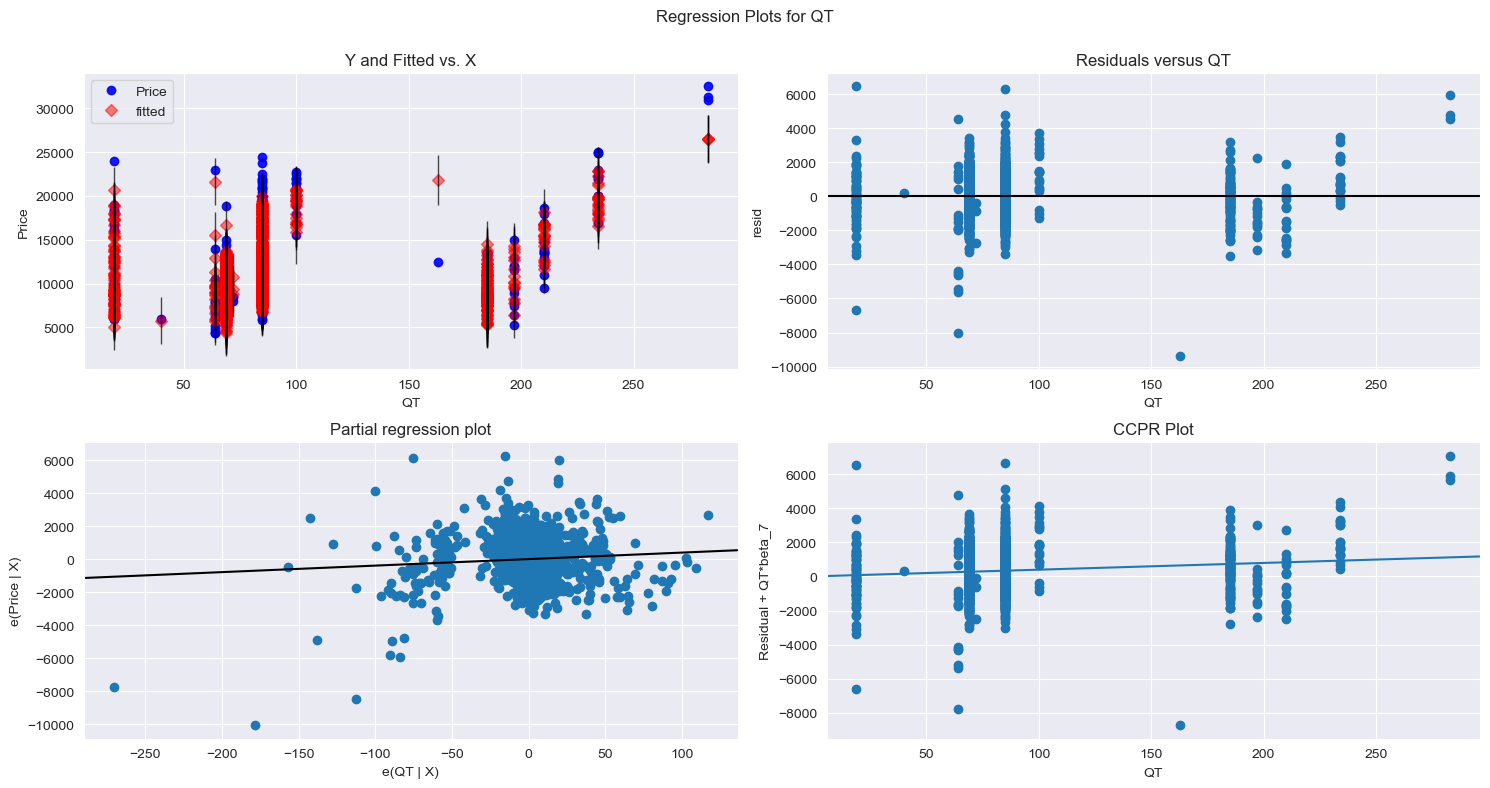

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show() 

eval_env: 1


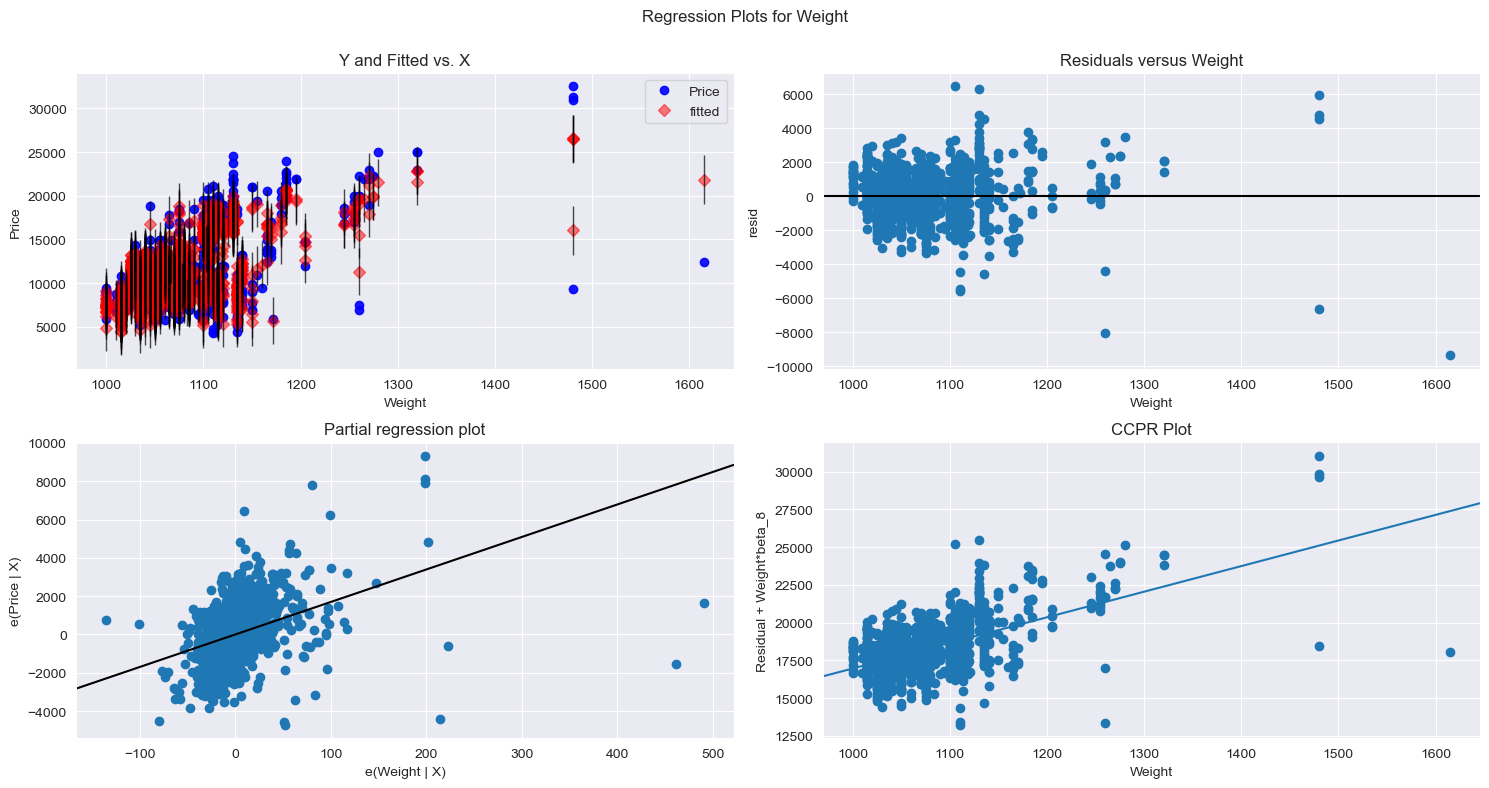

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

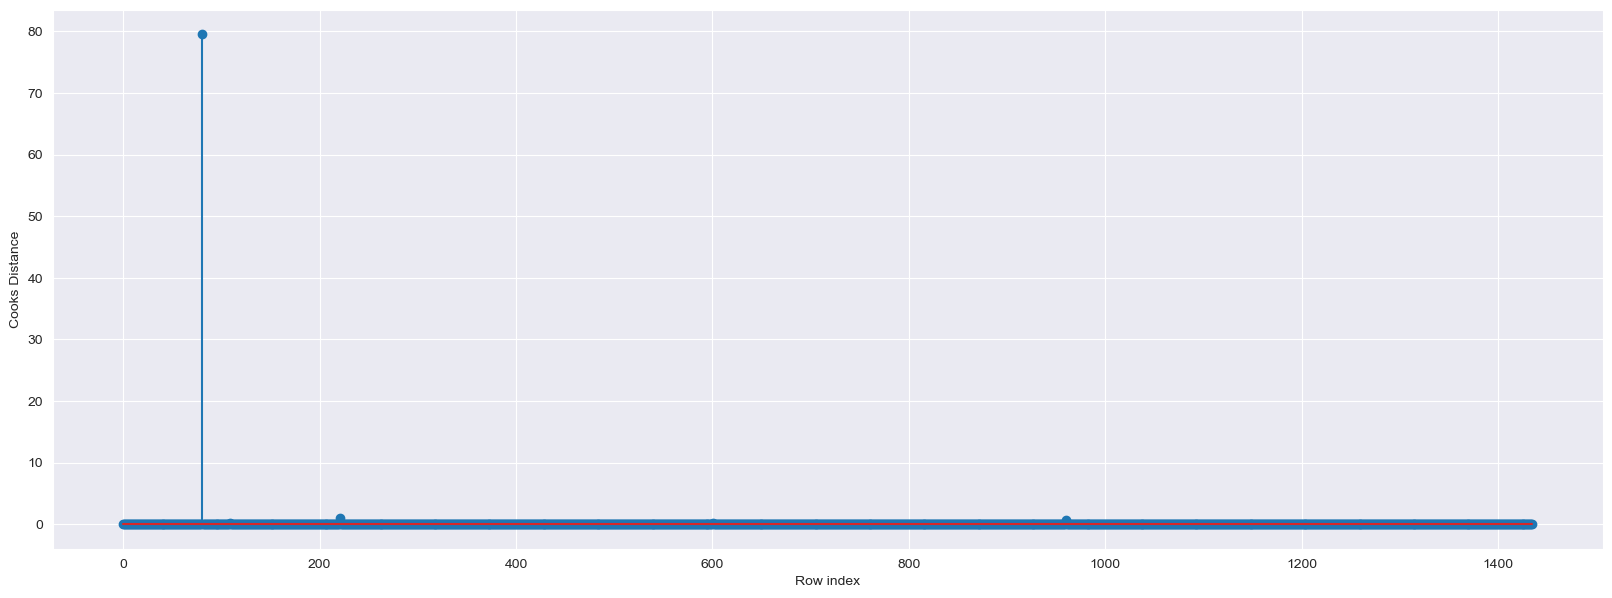

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(80, 79.52010624138717)

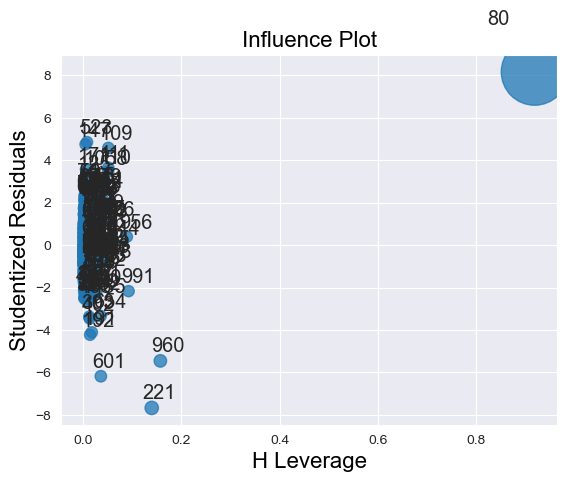

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k = 8
n = toyo3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.018802228412256268

From the above plot 80th observation is the influencer

In [38]:
toyo3[toyo3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model by removing influencers

In [47]:
toyo_new = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
toy1=toyo_new.drop(toyo_new.index[[80,147,523,221,601,960]],axis=0).reset_index()
toy1=toy1.drop(['index'],axis=1)
toy1


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1426,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1427,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1428,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [48]:
toy2=pd.concat([toy1.iloc[:,2:4],toy1.iloc[:,6:7],toy1.iloc[:,8:9],toy1.iloc[:,12:14],toy1.iloc[:,15:18]],axis=1)
toy2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [50]:
toy3=toy2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toy3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [52]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toy3).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1467.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:49:28   Log-Likelihood:                -12148.
No. Observations:                1430   AIC:                         2.431e+04
Df Residuals:                    1421   BIC:                         2.436e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.586e+04   1395.706    -11.363      0.000   -1.86e+04   -1.31e+04
Age         -109.9075      2.402    -45.750      0.000    -114.620    -105.195
KM            -0.0177      0.001    -15.259      0.000      -0.020      -0.015
HP            34.7371      2.665     13.034      0.000      29.509      39.965
CC            -3.7187      0.292    -12.750      0.000      -4.291      -3.147
Doors       -137.9932     36.291     -3.802      0.000    -209.182     -66.804
Gears        477.5819    174.472      2.737      0.006     135.331     819.833
QT             4.3849      1.343      3.266      0.001       1.751       7.019
Weight        31.7467      1.263     25.132      0.000      29.269      34.225
==============================================================================
Omnibus:                       44.802   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.973
Skew:                          -0.025   Prob(JB):                     2.94e-25
Kurtosis:                       4.376   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing the influencing values,the current R_square value of our model is 0.892 that is 89.2% and our adjusted R_square value is 0.891 that is 89.1% ,so that we have good accuracy with this model.


our AIC and BIC values are less compared to our initial model,so that i can conclude that this model is good with good accuracy.


if we want to increase our accuracy we just have to repeat the above process which is removing influencers(outliers) from our data till getting the expected accuracy.

In [56]:
model_influence_V = model1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

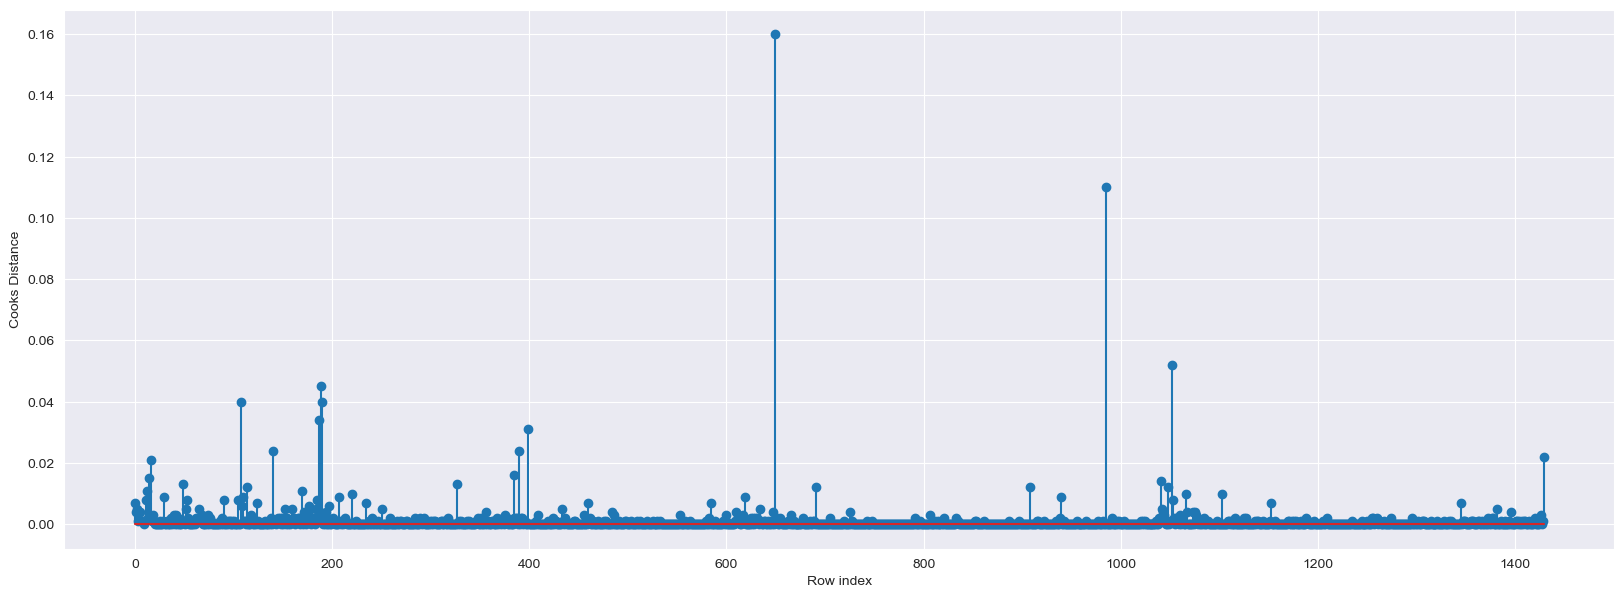

In [63]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [64]:
(np.argmax(c_V),np.max(c_V))

(649, 0.1604778380947979)

our maximum cooks distance value under acceptable margin (but we can improve this one if we want to get more accuracy) and we can consider this model.

# Predicting new data

In [65]:
model1.predict(toy3.iloc[0:5,])

0    16348.649173
1    15889.110042
2    16332.151104
3    16000.970717
4    15888.299512
dtype: float64

Prediction for our top 5 observations of our toy3 data

In [66]:
pred_T = model1.predict(toy3)
pred_T

0       16348.649173
1       15889.110042
2       16332.151104
3       16000.970717
4       15888.299512
            ...     
1425     9162.473168
1426     8542.624967
1427     8687.665080
1428     8799.343405
1429    10805.202460
Length: 1430, dtype: float64

# Predicting the Price by entering manual data in order to test the model

In [54]:
new_data=pd.DataFrame({'Age':40,"KM":50000,"HP":100,"CC":2500,"Doors":4,"Gears":5,"QT":150,"Weight":1200},index=[1])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
1,40,50000,100,2500,4,5,150,1200


In [68]:
model1.predict(new_data)

1    13624.923915
dtype: float64

For the above entered manual data(new data),the predicted Price by the new model is 13624.92

# Question 2

Predicting Profit of 50 startups by using given data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [2]:
star=pd.read_csv('50_Startups.csv')
star

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
star1=star.drop("State",axis=1)
star1

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
star1=star1.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKT'},axis=1)
star1

,RDS,ADM,MKT,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
star1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MKT     50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [11]:
star1.describe()

,RDS,ADM,MKT,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
star1.corr()

,RDS,ADM,MKT,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


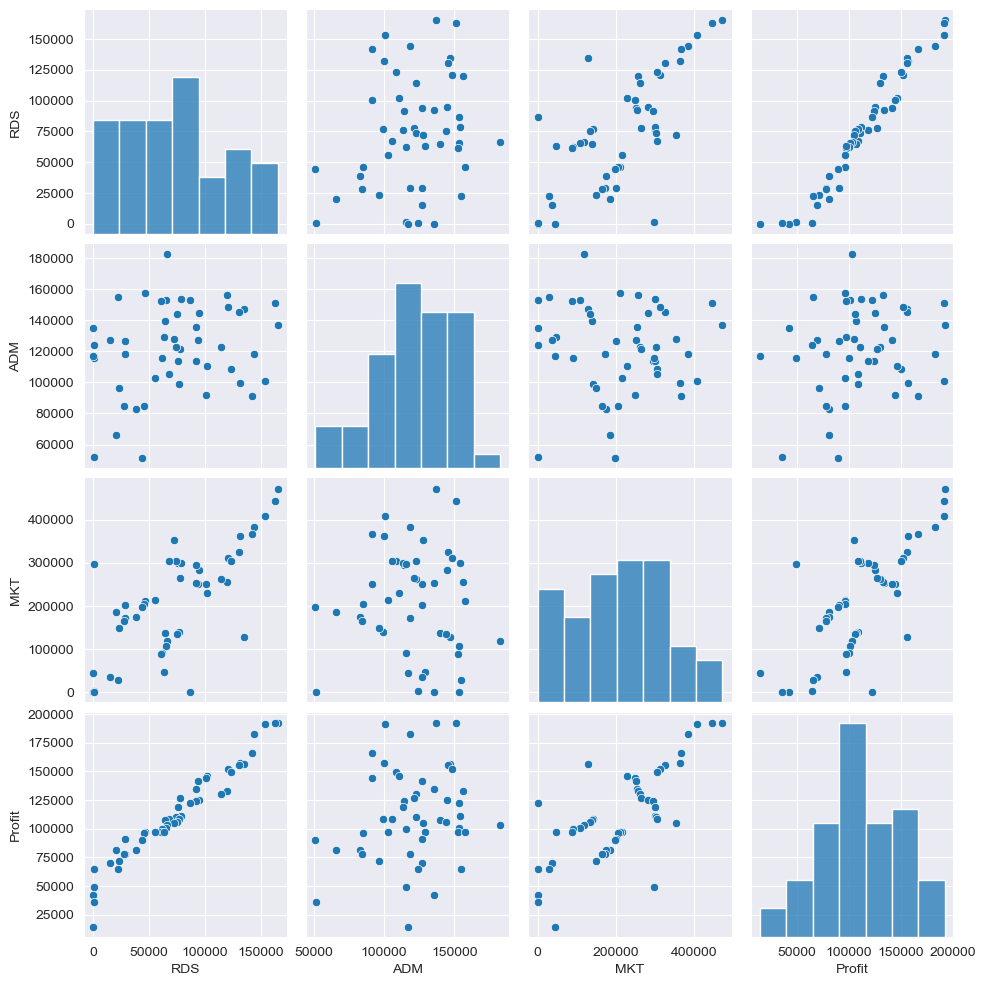

In [14]:
sns.set_style(style="darkgrid")
sns.pairplot(star1)

# Building Model

In [16]:
mod_1=smf.ols('Profit~RDS+ADM+MKT',data=star1).fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:39:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKT            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For this given model our R_square and adj R_Square values are 0.951 and 0.948 that is 95.1% and 94.8%,so far our model accuracy is good and no need of any transformation.

But the problem is with our Probability values of the data ADM and MKT,which are greater than 0.05.so,we need to cross check once how they are gonna behave in linear relationship and then decide whether to consider those data are not.

In [17]:
mod_1_1=smf.ols("Profit~ADM",data=star1).fit()
mod_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.162
Time:                        19:45:51   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
mod_1_2=smf.ols('Profit~MKT',data=star1).fit()
mod_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.38e-10
Time:                        19:47:15   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKT            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
mod_1_3=smf.ols('Profit~ADM+MKT',data=star1).fit()
mod_1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.50e-10
Time:                        19:48:44   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MKT            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By cross checking the P values behaviour of ADM and MKT data in linear relationship with the Profit,here is no problem with their P values as those are less than 0.05.so,we have to consider those values in building the model.

In [20]:
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:51:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKT            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So our model has R_square and adj R_square value as 0.951 and 0.948 that is 95.1%  and 94.8%.so that this model has good accuracy.
But let us try to improve our accuracy to get better model than this.

In [21]:
rsq_r=smf.ols('RDS~ADM+MKT',data=star1).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols('ADM~RDS+MKT',data=star1).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols('MKT~RDS+ADM',data=star1).fit().rsquared
vif_m=1/(1-rsq_m)
d2={'variables':['RDS','ADM','MKT'],'VIF':[vif_r,vif_a,vif_m]}
vif_df1=pd.DataFrame(d2)
vif_df1

,variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKT,2.326773


VIF values of variables are within the limit.so,we are gonna consider all the variables.

# Model Validation

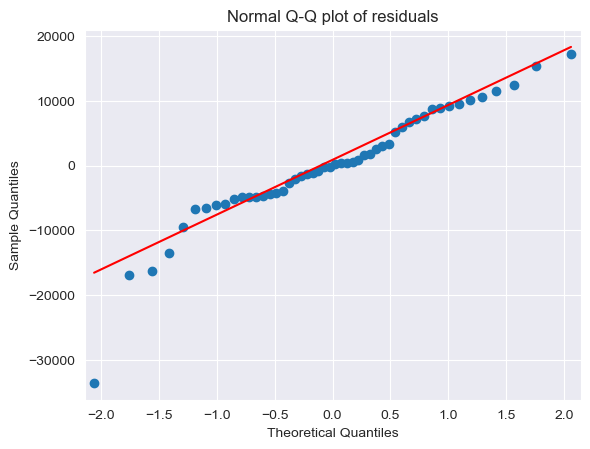

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(mod_1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(mod_1.resid<-30000))

[array([49], dtype=int64)]

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

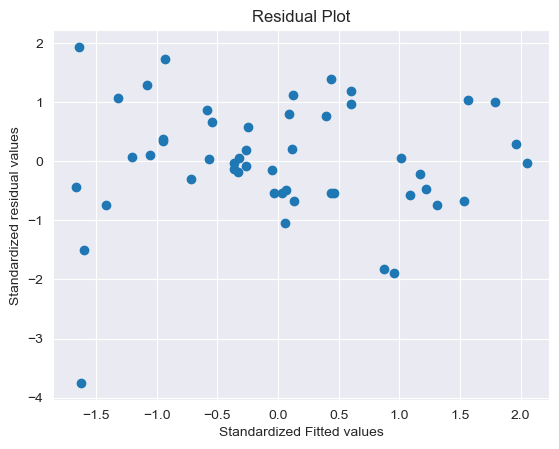

In [32]:
plt.scatter(get_standardized_values(mod_1.fittedvalues),
            get_standardized_values(mod_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

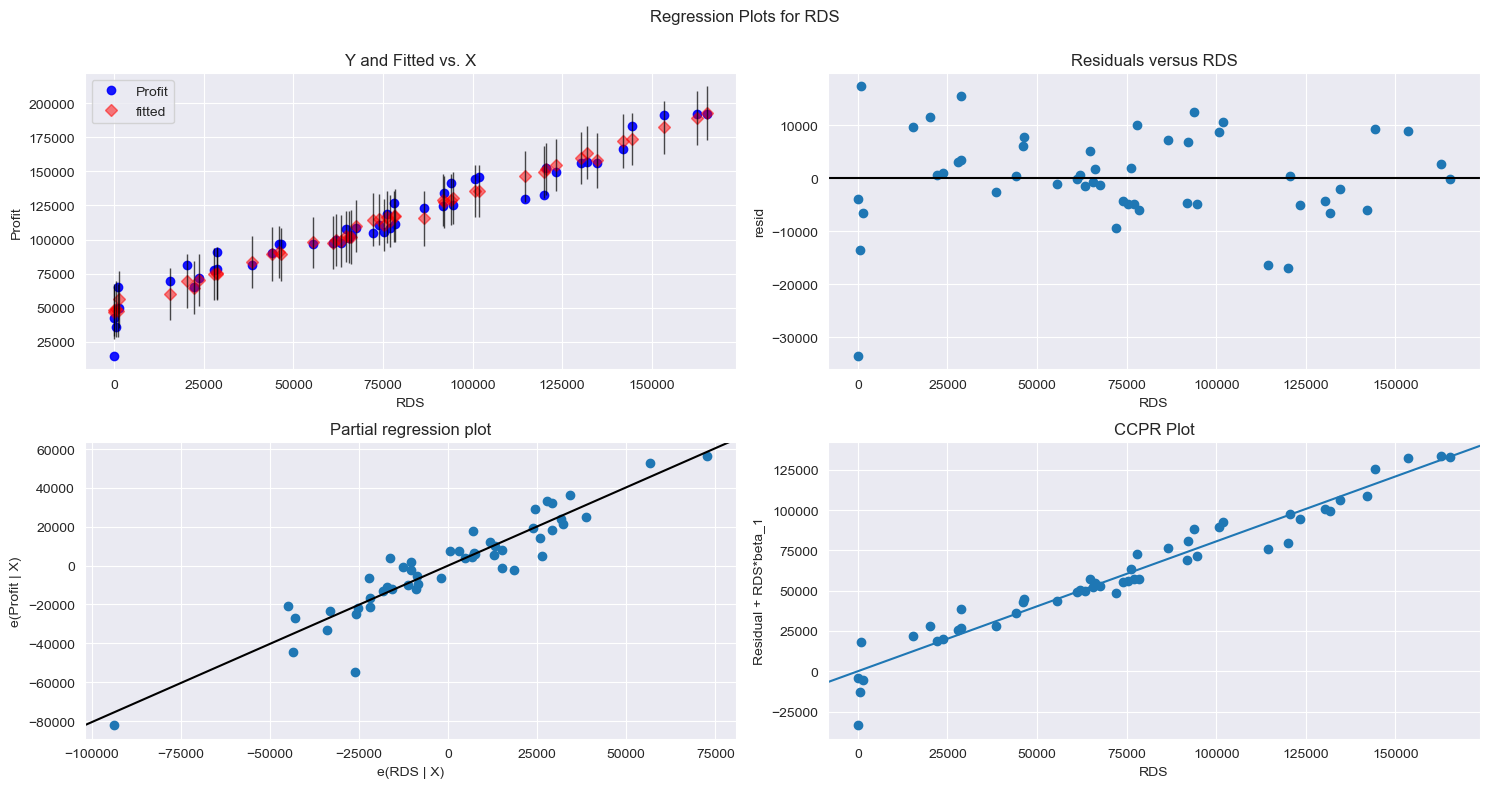

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(mod_1,'RDS',fig=fig)
plt.show()

eval_env: 1


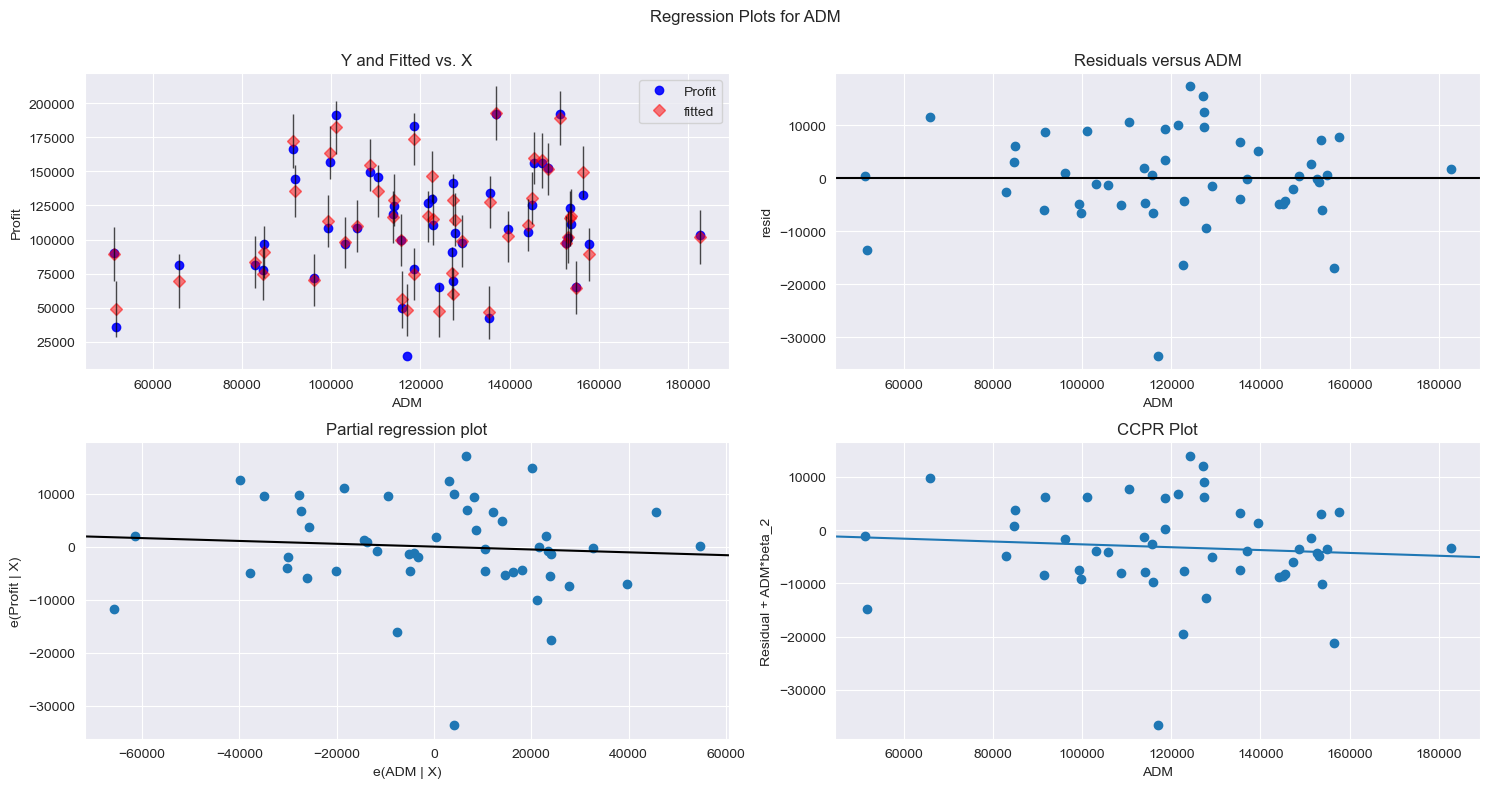

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(mod_1,'ADM',fig=fig)
plt.show()

eval_env: 1


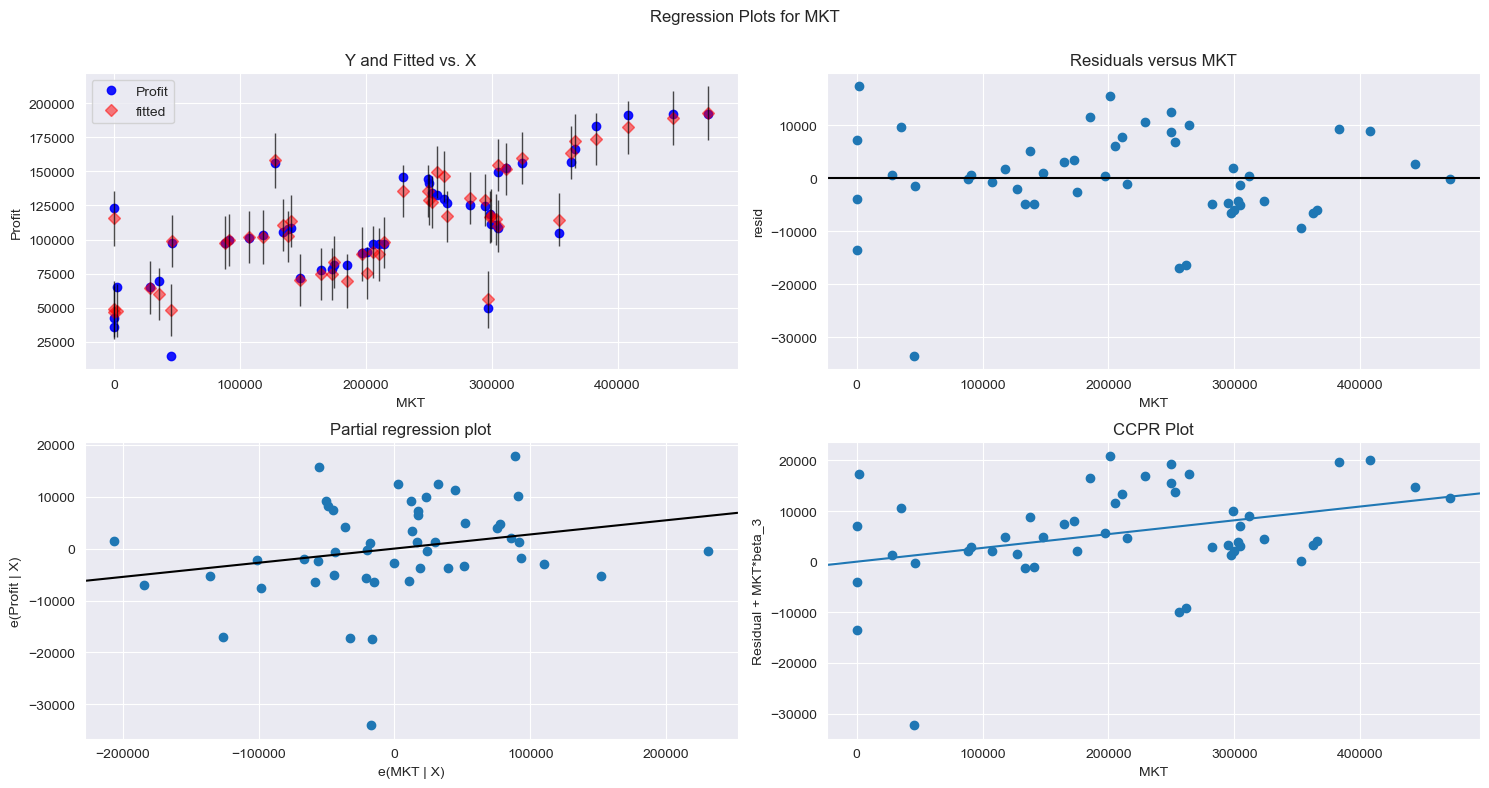

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(mod_1,'MKT',fig=fig)
plt.show()

# Checking for outliers

In [39]:
(c,_)=mod_1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

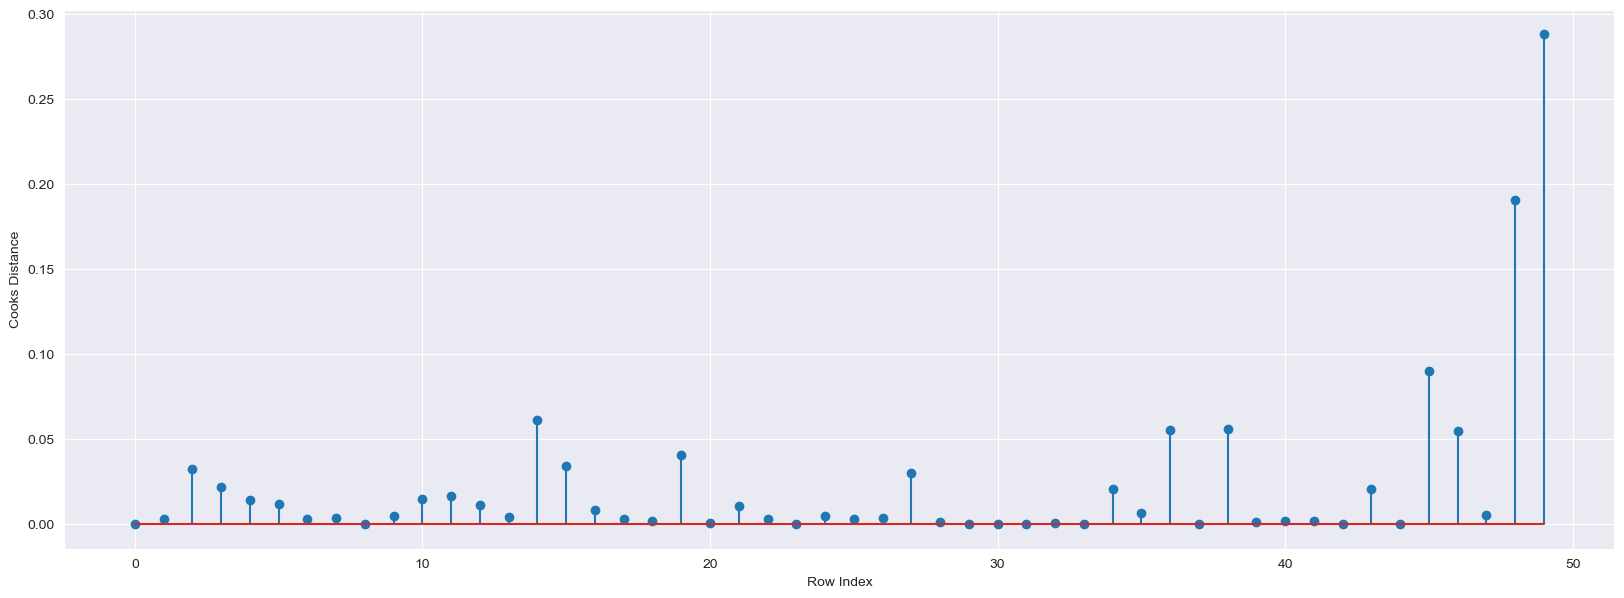

In [40]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(star1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

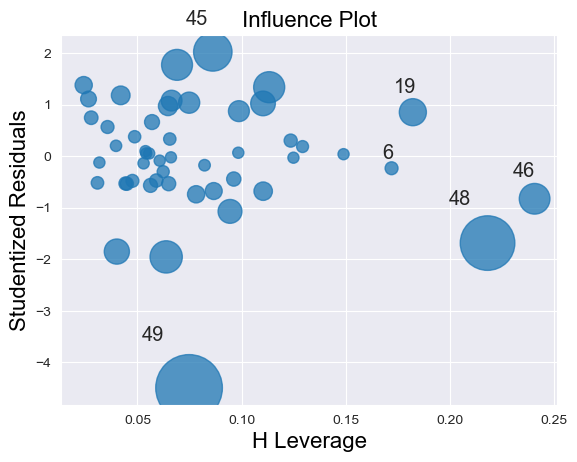

In [42]:
influence_plot(mod_1)
plt.show()

In [46]:
k=star1.shape[1]
n=star1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [47]:
star1[star1.index.isin([49])]

,RDS,ADM,MKT,Profit
49,0.0,116983.8,45173.06,14681.4


# Improving model by removing the outlier

In [48]:
star2=star1.drop(star1.index[[49]],axis=0).reset_index(drop=True)
star2


,RDS,ADM,MKT,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Final model

In [49]:
mod_2=smf.ols('Profit~RDS+ADM+MKT',data=star2).fit()
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        20:33:01   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKT            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this final model our R_square and adj R_square values are improved and our model accuracy is 96.1%

In [50]:
mod_2_influence_V = mod_2.get_influence()
(c_V, _) = mod_2_influence_V.cooks_distance

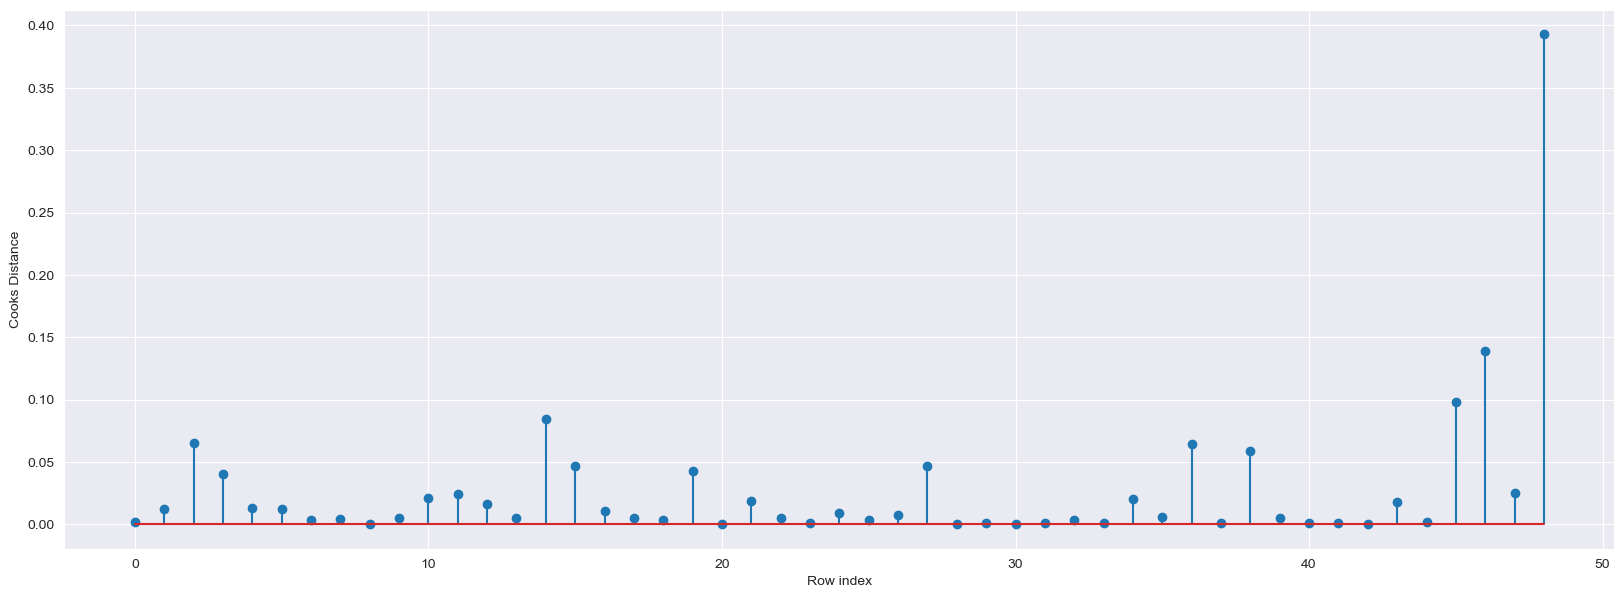

In [51]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [52]:
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321527)

our maximum cooks distance value under acceptable margin (but we can improve this one if we want to get more accuracy) and we can consider this model.

# Predicting new data

In [53]:
pred50=mod_2.predict(star2)
pred50

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

#  Predicting the Profit by entering manual data in order to test the model

In [56]:
new_1=pd.DataFrame({'RDS':440050,'ADM':855000,'MKT':985125},index=[0])
new_1

,RDS,ADM,MKT
0,440050,855000,985125


In [57]:
mod_2.predict(new_1)

0    402818.519324
dtype: float64

For our manually entered data our Profit value in 402818.51